<a href="https://colab.research.google.com/github/siddharthchd/Tensorflow_Developer/blob/main/lessons/lesson_cat_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-11-05 01:21:14--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 64.233.170.128, 108.177.13.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   160MB/s    in 0.4s    

2020-11-05 01:21:15 (160 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [5]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [11]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [12]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.502.jpg', 'cat.348.jpg', 'cat.457.jpg', 'cat.965.jpg', 'cat.312.jpg', 'cat.42.jpg', 'cat.334.jpg', 'cat.856.jpg', 'cat.785.jpg', 'cat.248.jpg']
['dog.290.jpg', 'dog.382.jpg', 'dog.982.jpg', 'dog.564.jpg', 'dog.344.jpg', 'dog.99.jpg', 'dog.24.jpg', 'dog.735.jpg', 'dog.889.jpg', 'dog.720.jpg']


In [13]:
print('Total training cat images : {}'.format(len(os.listdir(train_cats_dir))))
print('Total training dog images : {}'.format(len(os.listdir(train_dogs_dir))))

print('Total validation cat images : {}'.format(len(os.listdir(validation_cats_dir))))
print('Tota; validation dog images : {}'.format(len(os.listdir(validation_dogs_dir))))

Total training cat images : 1000
Total training dog images : 1000
Total validation cat images : 500
Tota; validation dog images : 500


In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for graph. Will output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0   # Index for iterating over images

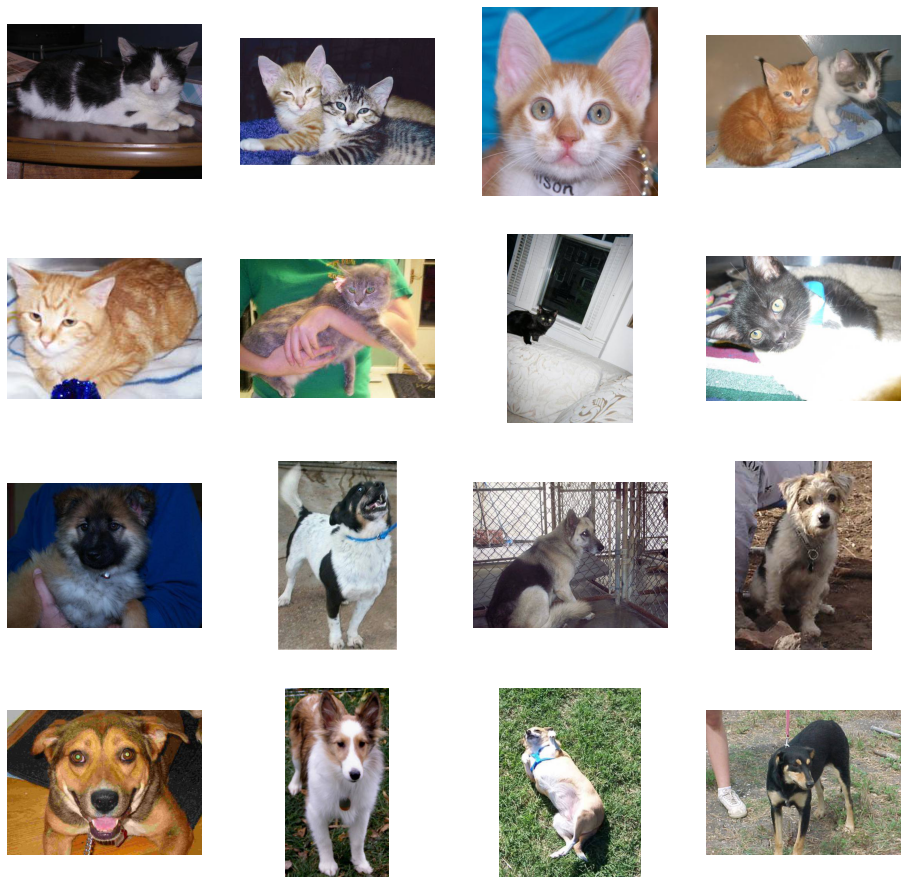

In [16]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index += 9

next_cat_pic = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[pic_index - 8 : pic_index]]
next_dog_pic = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[pic_index - 8 : pic_index]]

for i, img_path in enumerate(next_cat_pic + next_dog_pic):

  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [17]:
import tensorflow as tf

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [20]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(lr = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0 / 255.)
test_datagen = ImageDataGenerator(rescale = 1.0 / 255.)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (150, 150))
validation_generator = test_datagen.flow_from_directory(validation_dir, batch_size = 20, class_mode = 'binary', target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
history = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 15, validation_steps = 50, verbose = 2)

Epoch 1/15
100/100 - 57s - loss: 0.7892 - accuracy: 0.5655 - val_loss: 0.6672 - val_accuracy: 0.5780
Epoch 2/15
100/100 - 61s - loss: 0.6301 - accuracy: 0.6555 - val_loss: 0.6212 - val_accuracy: 0.6640
Epoch 3/15
100/100 - 57s - loss: 0.5442 - accuracy: 0.7335 - val_loss: 0.5894 - val_accuracy: 0.7080
Epoch 4/15
100/100 - 57s - loss: 0.4760 - accuracy: 0.7810 - val_loss: 0.6097 - val_accuracy: 0.6860
Epoch 5/15
100/100 - 57s - loss: 0.3844 - accuracy: 0.8270 - val_loss: 0.6052 - val_accuracy: 0.7080
Epoch 6/15
100/100 - 57s - loss: 0.3038 - accuracy: 0.8685 - val_loss: 0.6929 - val_accuracy: 0.7040
Epoch 7/15
100/100 - 57s - loss: 0.2123 - accuracy: 0.9190 - val_loss: 0.8276 - val_accuracy: 0.7110
Epoch 8/15
100/100 - 57s - loss: 0.1516 - accuracy: 0.9460 - val_loss: 0.9821 - val_accuracy: 0.7160
Epoch 9/15
100/100 - 58s - loss: 0.0941 - accuracy: 0.9645 - val_loss: 1.0593 - val_accuracy: 0.6810
Epoch 10/15
100/100 - 57s - loss: 0.0936 - accuracy: 0.9710 - val_loss: 1.2032 - val_accura

In [27]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  path = '/content/' + fn
  img = image.load_img(path, target_size = (150, 150))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size = 10)

  print(classes[0])

  if classes[0] > 0:
    print(fn + ' is a dog.')
  else:
    print(fn + ' is a cat.')

Saving 5df126b679d7570ad2044f3e.jpg to 5df126b679d7570ad2044f3e (1).jpg
Saving kitten-510651.jpg to kitten-510651 (1).jpg
[1.]
5df126b679d7570ad2044f3e.jpg is a dog.
[1.]
kitten-510651.jpg is a dog.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


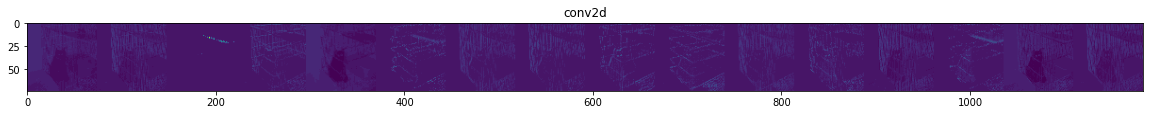

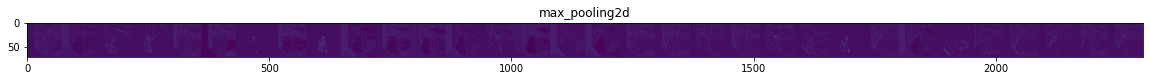

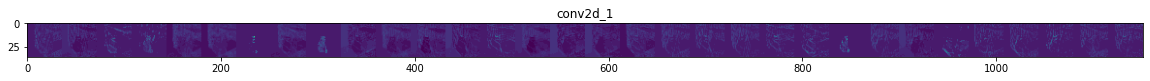

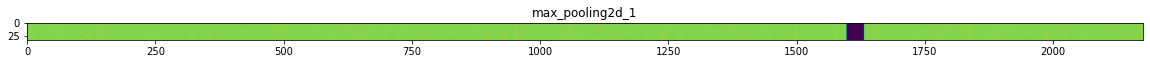

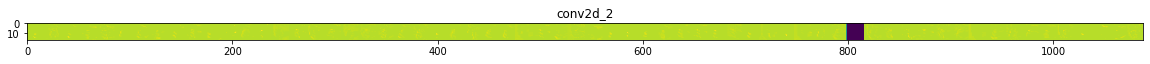

In [32]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size = (150, 150))

x = img_to_array(img)
x = x.reshape((1, ) + x.shape)

x /= 255.0

successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):

  if len(feature_map.shape) == 4:

    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]

    display_grid = np.zeros((size, size * n_features))

    for i in range(n_features):

      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *- 64
      x += 128
      x = np.clip( x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / n_features
    plt.figure(figsize = (scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

Text(0.5, 1.0, 'Training and Validation Losses')

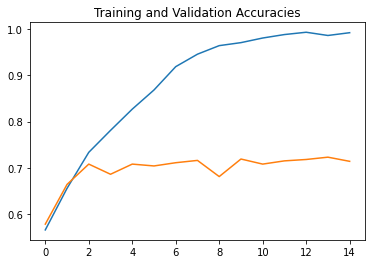

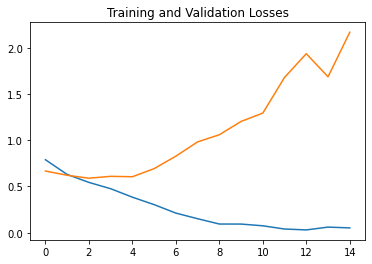

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and Validation Accuracies')
plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and Validation Losses')

In [ ]:
import os, signal

os.kill(     os.getpid() , 
         signal.SIGKILL
       )